In [7]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np 
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from keras.models import model_from_json
import numpy as np
from keras_unet.model_utils import normalize_MRIvolume

from sklearn.model_selection import train_test_split
from utils import *
from keras_unet.models import custom_unet
from keras_unet.losses import bce_dice_loss

from keras.optimizers import Adam
from keras_unet.metrics import iou, iou_thresholded

In [2]:
# different data paths 
LGG_path = 'Data/lgg-mri-segmentation/kaggle_3m'

In [3]:

def read_in_images(BC_path,msk_path,img_path):
    Images = []
    Masks = []
  
    for img in img_path:
        temp_img = BC_path+'/Images/' +img
        temp_img = cv2.imread(temp_img)
        Images.append(temp_img)

    for msk in msk_path:
        temp_msk = BC_path+ '/Masks/'+msk
        temp_msk = cv2.imread(temp_msk)
        Masks.append(temp_msk)

    return Images, Masks

In [4]:
#load datas

BC_path = 'Data/breast_cancer_cells'

img_path = BC_path + '/Images/'
msk_path = BC_path + '/Masks/'

imgs = os.listdir(img_path)
msks = os.listdir(msk_path)

In [5]:
#sort 
msks = sorted(msks)
imgs = sorted(imgs)

In [7]:
i = cv2.imread(img_path+imgs[2])

In [8]:
i.shape

(768, 896, 3)

In [9]:
768/3

256.0

In [10]:
896/3

298.6666666666667

In [11]:
image_paths,mask_paths = load_images(LGG_path)

image_paths = sorted(image_paths)
mask_paths = sorted(mask_paths)

masks,images = read_in_images(image_paths,mask_paths)
    


TypeError: read_in_images() missing 1 required positional argument: 'img_path'

In [ ]:
len(image_paths)

In [ ]:
len(mask_paths)

In [ ]:
masks

In [ ]:
for i in range(0,len(masks)):
    m = masks[i]
    m = m[:,:,0]
    #m.reshape(m.shape[0],m.shape[1])
    masks[i] = m

#make Arrays 
images = np.asarray(images)
masks = np.asarray(masks)
masks = masks / 255
masks = masks.reshape(masks.shape[0],masks.shape[1],masks.shape[2],1)


#split the data
img_overall_train, img_test, mask_overall_train, mask_test = train_test_split(images, masks, test_size=0.16667, random_state=42)
img_train, img_val, mask_train, mask_val = train_test_split(img_overall_train, mask_overall_train, test_size = 0.166667, random_state = 32)

In [ ]:
masks[1].shape

In [ ]:
plt.

In [ ]:
def shuffle_in_unison_scary(a, b):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)

In [ ]:
mask_test.shape

In [ ]:
shuffle_in_unison_scary(img_train,mask_train)

In [ ]:
mask_test = mask_test.reshape(mask_test.shape[0],mask_test.shape[1],mask_test.shape[2])

In [ ]:
plt.imshow(img_test[3])

In [ ]:
plot_figures(img_test,mask_test)

In [ ]:
plt.imshow(mask_train[8])

In [35]:
loaded_model = load_model('evaluations/final_models/LGG Models/Basic_LGG_aug_UNET_01LR.h5',custom_objects={'iou':iou, 'iou_thresholded':iou_thresholded,'bce_dice_loss':bce_dice_loss})
#loaded_model = load_model('evaluations/final_models/LGG Models/randomIDEA500epochLGG_aug_UNET_01LR.h5',custom_objects={'iou':iou, 'iou_thresholded':iou_thresholded,'bce_dice_loss':bce_dice_loss})

In [36]:
preds = loaded_model.predict(img_test)

In [ ]:
prediction = preds[1]
true = mask_test[1]
prediction = prediction.reshape(prediction.shape[0],prediction.shape[1])

In [ ]:
true = true.reshape(true.shape[0],true.shape[1])

In [ ]:
mask_test.shape

In [ ]:
#make Arrays 
img_test = np.asarray(img_test)
mask_test = np.asarray(mask_test)
mask_test = mask_test / 255
mask_test = mask_test.reshape(mask_test.shape[0],mask_test.shape[1],mask_test.shape[2],1)

In [ ]:
preds.shape

In [ ]:
mask_test.shape

In [ ]:
mask_test.shape

In [6]:
def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    dice = K.mean((2. * intersection + smooth)/(union + smooth), axis=0)
    return dice

In [ ]:
## Mean Squared Error

In [59]:
mse = ((preds - mask_test)**2).mean()

In [60]:
mse

0.005966781

In [61]:
mae = (np.abs(preds - mask_test)).mean()

In [62]:
mae

0.0061378023

In [58]:
mask_test = np.asarray(mask_test)
preds = np.asarray(preds)

In [64]:
np.asarray(bce_dice_loss(preds,mask_test)).mean()

0.44435206

In [ ]:
preds.shape

In [ ]:
mask_test.shape

In [63]:
val = dice_coef(preds,mask_test)
val

<tf.Tensor: shape=(), dtype=float32, numpy=0.64994425>

In [8]:
#load dataset
image_paths,mask_paths = load_images("Data/lgg-mri-segmentation/kaggle_3m/")

image_paths = sorted(image_paths)
mask_paths = sorted(mask_paths)

if image_mask_check(image_paths, mask_paths):
    masks,images = read_in_images(image_paths,mask_paths)
    
for i in range(0,len(masks)):
    m = masks[i]
    m = m[:,:,0]
    m.reshape(m.shape[0],m.shape[1])
    masks[i] = m
    #MRI Values
    im = images[i]
    #images[i] = normalize_MRIvolume(im)
    
#make Arrays 
images = np.asarray(images)
masks = np.asarray(masks)
masks = masks / 255
masks = masks.reshape(masks.shape[0],masks.shape[1],masks.shape[2],1)


#split the data
img_overall_train, img_test, mask_overall_train, mask_test = train_test_split(images, masks, test_size=0.16667, random_state=42)
img_train, img_val, mask_train, mask_val = train_test_split(img_overall_train, mask_overall_train, test_size = 0.166667, random_state = 32)

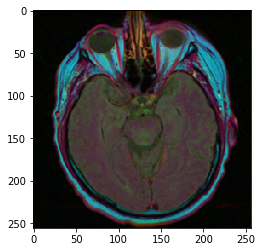

In [9]:
plt.imshow(images[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


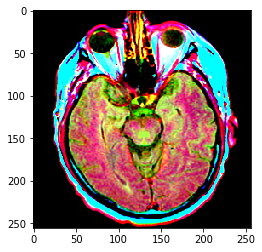

In [20]:
plt.imshow(normalize_MRIvolume(images[1]))

In [19]:
from utils import plot_figures

In [12]:
def plot_figures(img_path, msk_path):
    rows,cols=3,3
    fig=plt.figure(figsize=(10,10))
    for i in range(1,rows*cols+1):
        fig.add_subplot(rows,cols,i)
        i_path=img_path[i]
        m_path=msk_path[i]
        img = i_path
        msk = m_path
        #img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.imshow(msk,alpha=0.4)
    plt.show()

In [38]:
mask_test = mask_test.reshape(mask_test.shape[0],mask_test.shape[1],mask_test.shape[2])
preds = preds.reshape(preds.shape[0],preds.shape[1],preds.shape[2])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


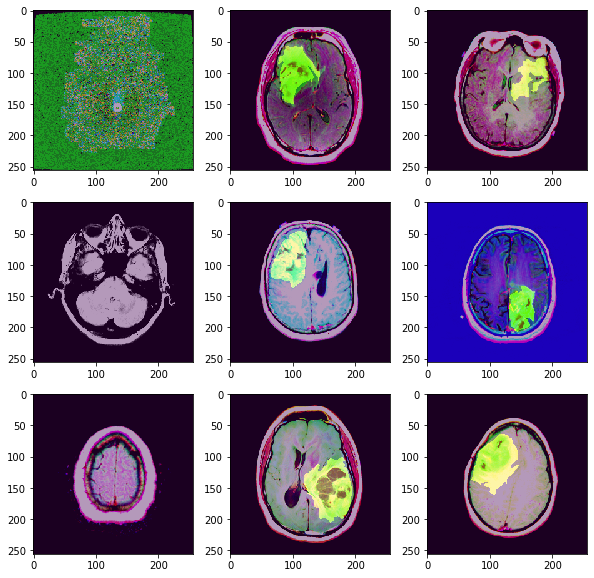

In [39]:
plot_figures(img_test,mask_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


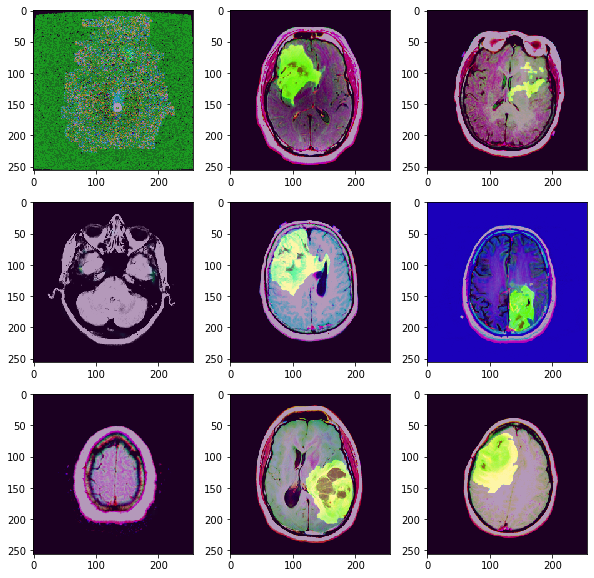

In [40]:
lame2 = preds/preds.max()

plot_figures(img_test,preds)

In [ ]:
plt.imshow(preds[6])

In [ ]:
plt.imshow(preds[3])

In [ ]:
plt.imshow(mask_test[3])

In [41]:
preds = tf.cast(preds, 'float32', name=None
)
mask_test = tf.cast(mask_test,'float32')
iou(preds,mask_test)

<tf.Tensor: shape=(), dtype=float32, numpy=0.48142132>

In [ ]:
iou_thresholded(preds,mask_test)

In [ ]:
preds.shape

In [44]:
import keras.backend as K

In [45]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred = K.cast(y_pred, 'float32')
    y_pred_f = K.cast(K.greater(K.flatten(y_pred), 0.5), 'float32')
    intersection = y_true_f * y_pred_f
    score = 2. * K.sum(intersection) / (K.sum(y_true_f) + K.sum(y_pred_f))
    return score

In [46]:
#accuracy is defined as the correct/total 
def pixelwise_accuracy(truth, prediction):
    #number of images to loop through
    num_images = truth.shape[0]
    #correct and total for final division
    sum_correct = 0
    sum_total = 0
    
    for i in range(0,num_images):
        #evaluate current mask 
        eval_prediction = prediction[i,:,:]
        eval_test = truth[i,:,:]
        #add up similarities and total values 
        sum_total += eval_test.shape[0] *eval_test.shape[1]
        for w in range(0,eval_test.shape[0]):
            for h in range(0,eval_test.shape[1]):
                if (eval_prediction[w,h] == eval_test[w,h]):
                    sum_correct += 1
    return sum_correct/sum_total
        
    

In [47]:
def threshold_binarize(x, threshold=0.5):
    ge = tf.greater_equal(x, tf.constant(threshold))
    y = tf.where(ge, x=tf.ones_like(x), y=tf.zeros_like(x))
    return y

In [48]:
#threshold the pixelwise accuracy value using two functions we already have 
def thresholded_pixelwise_accuracy(truth, prediction):
    new_preds = threshold_binarize(prediction,0.5)
    return pixelwise_accuracy(truth, new_preds)

In [49]:
preds = np.asarray(preds)
mask_test = np.asarray(mask_test)
preds.shape

(655, 256, 256)

In [50]:
thresholded_pixelwise_accuracy(mask_test,preds)

0.99388427734375

In [51]:
#precision is known as the TP/(TP+FP)
#this shows the purity 

def thresholded_precision(truth,prediction):
    #binarize threshold
    new_preds = threshold_binarize(prediction, 0.5)
    #starting loop and shape variables 
    num_images = truth.shape[0]
    num_TP = 0
    num_predictedPositives = 0 
    
    #loop through all images 
    for i in range(0,num_images):
        #evaluate current mask 
        eval_prediction = new_preds[i,:,:]
        eval_test = truth[i,:,:]
        #find total positive guesses 
        for w in range(0,eval_test.shape[0]):
            for h in range(0,eval_test.shape[1]):
                if (eval_prediction[w,h] == 1):
                    num_predictedPositives +=1
                    if (eval_test[w,h] == 1):
                        num_TP +=1 
    
    if (num_predictedPositives ==0):
        return 0 
    else:
        return num_TP/num_predictedPositives 

In [52]:
thresholded_precision(mask_test,preds)

0.74056992457147

In [53]:
#TP / TP + FN 
#recall shows the completeness 
def thresholded_recall(truth,prediction):
    #binarize threshold
    new_preds = threshold_binarize(prediction, 0.5)
    #starting loop and shape variables 
    num_images = truth.shape[0]
    num_TP = 0
    num_allPositives = 0 
    
    #loop through all images 
    for i in range(0,num_images):
        #evaluate current mask 
        eval_prediction = new_preds[i,:,:]
        eval_test = truth[i,:,:]
        #find total positive guesses 
        for w in range(0,eval_test.shape[0]):
            for h in range(0,eval_test.shape[1]):
                if (eval_test[w,h] == 1):
                    num_allPositives +=1
                    if (eval_prediction[w,h] == 1):
                        num_TP +=1 
    
    if (num_allPositives ==0):
        return 0 
    else:
        return num_TP/num_allPositives 
    

In [54]:
thresholded_recall(mask_test,preds)

0.5815101592922032